# Deep Learning and Gradient Boosting for Urban Environmental Noise Monitoring in Smart Cities

 Program 1 - Prediction / forecasting
* The goal is to reproduce the results obtained in paper
Deep Learning and Gradient Boosting for Urban Environmental Noise Monitoring in Smart Cities
* Data
    * Provided by DataParkmeter.zip file (3 CSV file; one for each Parkmeter of the paper)
    * Preprocess data as explained
* Use TimeseriesGenerator to generate training or testing data
* Evaluate the prediction performance of the different deep learning models
described in the paper to predict future noise levels (short / long term predict.)
* Once suitable predictions will be obtained try to
    * Use them in order to detect false data injection attacks as done in the paper
* You can also try to deal with pollution data particles...
 

<b>Submitted By:</b>
>   <li>  <a href="https://motiur.info" target="_blank"> Sheikh Shah Mohammad Motiur Rahman</a></li>
>    <li> <a href="https://b.gorelkin.me" target="_blank">Bogdan Gorelkin </a></li>

# 1. Preprocess Data

1.1 : Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# 1.2 Load Data

In [2]:
data500 = pd.read_csv("dataset/DataParkmeter500.csv")
data515 = pd.read_csv("dataset/DataParkmeter515.csv")
data521 = pd.read_csv("dataset/DataParkmeter521.csv")

# 1.3 Explore data

In [3]:
data500.head()

,batch_id,calibration*mic,config,configVer,data*LAeq,data*co2,data*humidity,data*humidityRH,data*no2,dataNoise0,...,meta*no2*lifetime,meta*no2*serial,meta*noise*gain,meta*noise*offset,meta*noise*sensibility,meter_code,park_code,serial,timestamp,version
0,180921093345,2006.0,noname,_,6500,-1.0,25336,42.324585,255,0,...,87.0,3796.0,20.0,65529.0,2006.0,500,220,0,1989-01-25 09:11:00,1
1,180921093345,NaN,noname,_,6725,-1.0,25192,42.049927,255,0,...,NaN,NaN,NaN,NaN,NaN,500,220,0,1989-01-25 09:12:00,1
2,180921093345,2006.0,noname,_,7058,-1.0,25148,41.966003,255,0,...,87.0,3796.0,20.0,65529.0,2006.0,500,220,800034,1989-01-25 09:14:00,1
3,180921093345,NaN,noname,_,7660,-1.0,25200,42.065186,255,0,...,NaN,NaN,NaN,NaN,NaN,500,220,800034,1989-01-25 09:15:00,1
4,180921093345,NaN,noname,_,7636,-1.0,25000,41.683716,255,0,...,NaN,NaN,NaN,NaN,NaN,500,220,800034,1989-01-25 09:16:00,1


In [4]:
data515.head()

,batch_id,calibration*mic,config,configVer,data*LAeq,data*co2,data*humidity,data*humidityRH,data*no2,dataNoise0,...,meta*no2*lifetime,meta*no2*serial,meta*noise*gain,meta*noise*offset,meta*noise*sensibility,meter_code,park_code,serial,timestamp,version
0,180921114122,2086.0,noname,_,7217,-1.0,38660,67.738098,255,0,...,100.0,4063.0,20.0,3.0,2086.0,515,220,800035,1989-01-25 11:33:00,1
1,180921114122,NaN,noname,_,7031,-1.0,39020,68.424744,255,0,...,NaN,NaN,NaN,NaN,NaN,515,220,800035,1989-01-25 11:34:00,1
2,180921114122,NaN,noname,_,7658,-1.0,39392,69.134277,255,0,...,NaN,NaN,NaN,NaN,NaN,515,220,800035,1989-01-25 11:35:00,1
3,180921114122,2086.0,noname,_,6889,-1.0,38980,68.348450,255,0,...,100.0,4063.0,20.0,3.0,2086.0,515,220,800035,1989-01-25 11:35:00,1
4,180921114122,NaN,noname,_,6776,-1.0,38660,67.738098,255,0,...,NaN,NaN,NaN,NaN,NaN,515,220,800035,1989-01-25 11:36:00,1


In [5]:
data521.head()

,batch_id,calibration*mic,config,configVer,data*LAeq,data*co2,data*humidity,data*humidityRH,data*no2,dataNoise0,...,meta*no2*lifetime,meta*no2*serial,meta*noise*gain,meta*noise*offset,meta*noise*sensibility,meter_code,park_code,serial,timestamp,version
0,181003110942,2108.0,noname,_,6834,-1.0,34872,60.513062,255,0,...,94.0,3798.0,19.0,3.0,2108.0,521,220,0,1989-02-07 11:15:00,1
1,181003110942,2108.0,noname,_,6833,-1.0,33444,57.789368,255,0,...,94.0,3798.0,19.0,3.0,2108.0,521,220,800044,1989-02-07 12:03:00,1
2,181003110942,2108.0,noname,_,6979,-1.0,33460,57.819885,255,0,...,94.0,3798.0,19.0,3.0,2108.0,521,220,800044,1989-02-07 12:05:00,1
3,181003121239,NaN,noname,_,65535,-1.0,32940,56.828064,255,0,...,NaN,NaN,NaN,NaN,NaN,521,220,800044,1989-02-07 12:10:00,1
4,181003121239,NaN,noname,_,65535,-1.0,32896,56.744141,255,0,...,NaN,NaN,NaN,NaN,NaN,521,220,800044,1989-02-07 11:09:46,1


In [6]:
data500.info()

data515.info()

data521.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29586 entries, 0 to 29585
Columns: 102 entries, batch_id to version
dtypes: float64(9), int64(87), object(6)
memory usage: 23.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42096 entries, 0 to 42095
Columns: 102 entries, batch_id to version
dtypes: float64(9), int64(87), object(6)
memory usage: 32.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33336 entries, 0 to 33335
Columns: 102 entries, batch_id to version
dtypes: float64(9), int64(87), object(6)
memory usage: 25.9+ MB


# 1.4 Select Data of Noise only with measured_time

In [7]:
df500 = data500.drop(columns = ['batch_id','calibration*mic','config','configVer','data*LAeq','data*co2','data*humidity','data*humidityRH','data*no2','data*particles','data*temperature','data*temperatureTC','location','meta*no2*gaz','meta*no2*lifetime','meta*no2*serial','meta*noise*gain','meta*noise*offset','meta*noise*sensibility','meter_code','park_code','serial','timestamp','version'])
#df500

In [8]:
df515 = data515.drop(columns = ['batch_id','calibration*mic','config','configVer','data*LAeq','data*co2','data*humidity','data*humidityRH','data*no2','data*particles','data*temperature','data*temperatureTC','location','meta*no2*gaz','meta*no2*lifetime','meta*no2*serial','meta*noise*gain','meta*noise*offset','meta*noise*sensibility','meter_code','park_code','serial','timestamp','version'])
final_df = df515

In [9]:
df521 = data521.drop(columns = ['batch_id','calibration*mic','config','configVer','data*LAeq','data*co2','data*humidity','data*humidityRH','data*no2','data*particles','data*temperature','data*temperatureTC','location','meta*no2*gaz','meta*no2*lifetime','meta*no2*serial','meta*noise*gain','meta*noise*offset','meta*noise*sensibility','meter_code','park_code','serial','timestamp','version'])
#df521

# 1.5 Average Noise Lebel with measured_time

In [10]:
df_n_500 = df500.drop(columns=['measured_time'])

for i in range(0,76):
    df_n_500['dataNoise'+str(i)] *= (35 + i)

df_n_500['average_noise'] = df_n_500.sum(axis = 1, skipna = True)/df500.sum(axis = 1, skipna = True)
df_n_500['measured_time'] = df500['measured_time']
final_df_500 = df_n_500.loc[:, 'average_noise':'measured_time']
final_df_500

,average_noise,measured_time
0,48.867925,2018-09-21 09:11:00+00:00
1,47.883333,2018-09-21 09:12:00+00:00
2,52.377358,2018-09-21 09:14:00+00:00
3,55.100000,2018-09-21 09:15:00+00:00
4,58.516667,2018-09-21 09:16:00+00:00
...,...,...
29581,73.416945,2020-01-29 15:45:00+00:00
29582,75.665924,2020-01-29 16:00:00+00:00
29583,75.542921,2020-01-29 16:15:00+00:00
29584,74.389075,2020-01-29 16:30:00+00:00


In [11]:
df_n_515 = df515.drop(columns=['measured_time'])

for i in range(0,76):
    df_n_515['dataNoise'+str(i)] *= (35 + i)

df_n_515['average_noise'] = df_n_515.sum(axis = 1, skipna = True)/df515.sum(axis = 1, skipna = True)
df_n_515['measured_time'] = df515['measured_time']
final_df_515 = df_n_515.loc[:, 'average_noise':'measured_time']

final_515_for_evaluation = final_df_515
final_515_for_evaluation.shape

(42096, 2)

In [12]:
df_n_521 = df521.drop(columns=['measured_time'])

for i in range(0,76):
    df_n_521['dataNoise'+str(i)] *= (35 + i)

df_n_521['average_noise'] = df_n_521.sum(axis = 1, skipna = True)/df521.sum(axis = 1, skipna = True)
df_n_521['measured_time'] = df521['measured_time']
final_df_521 = df_n_521.loc[:, 'average_noise':'measured_time']

final_df_521

,average_noise,measured_time
0,52.528302,2018-10-03 11:15:00+00:00
1,51.415094,2018-10-03 12:03:00+00:00
2,52.037736,2018-10-03 12:05:00+00:00
3,46.636364,2018-10-03 12:10:00+00:00
4,50.714286,2018-10-03 11:09:46+00:00
...,...,...
33331,72.336678,2020-01-18 12:30:00+00:00
33332,72.043430,2020-01-18 12:45:00+00:00
33333,72.383073,2020-01-18 13:00:00+00:00
33334,74.531180,2020-01-18 13:15:00+00:00


# Select data within the provided range

In [13]:
date_range = pd.date_range(start='2019-05-01 00:00:00+00:00', end='2019-05-16 00:00:00+00:00', freq='1H')
final_df_500 = final_df_500[(final_df_500['measured_time'] > '2019-05-01 00:00:00+00:00') & (final_df_500['measured_time'] <= '2019-05-16 00:00:00+00:00')]
final_df_500

,average_noise,measured_time
8907,58.232999,2019-05-01 00:15:00+00:00
8908,54.942094,2019-05-01 00:30:00+00:00
8909,58.777035,2019-05-01 00:45:00+00:00
8910,57.467706,2019-05-01 01:00:00+00:00
8911,54.648107,2019-05-01 01:15:00+00:00
...,...,...
10343,65.255295,2019-05-15 23:00:00+00:00
10344,63.814031,2019-05-15 23:15:00+00:00
10345,61.014493,2019-05-15 23:30:00+00:00
10346,60.461024,2019-05-15 23:45:00+00:00


In [14]:
date_range = pd.date_range(start='2019-05-01 00:00:00+00:00', end='2019-05-16 00:00:00+00:00', freq='1H')
final_df_515 = final_df_515[(final_df_515['measured_time'] > '2019-05-01 00:00:00+00:00') & (final_df_515['measured_time'] <= '2019-05-16 00:00:00+00:00')]
final_df_515_m1 = final_df_515
final_df_515

,average_noise,measured_time
15815,62.008919,2019-05-01 00:15:00+00:00
15816,57.312152,2019-05-01 00:30:00+00:00
15817,59.867483,2019-05-01 00:45:00+00:00
15818,60.245262,2019-05-01 01:00:00+00:00
15819,58.511136,2019-05-01 01:15:00+00:00
...,...,...
17250,70.884058,2019-05-15 23:00:00+00:00
17251,68.212695,2019-05-15 23:15:00+00:00
17252,66.700111,2019-05-15 23:30:00+00:00
17253,63.978818,2019-05-15 23:45:00+00:00


In [15]:
date_range = pd.date_range(start='2019-05-01 00:00:00+00:00', end='2019-05-16 00:00:00+00:00', freq='1H')
final_df_521 = final_df_521[(final_df_521['measured_time'] > '2019-05-01 00:00:00+00:00') & (final_df_521['measured_time'] <= '2019-05-16 00:00:00+00:00')]
final_df_521

,average_noise,measured_time
8951,55.491639,2019-05-01 00:15:00+00:00
8952,51.505017,2019-05-01 00:30:00+00:00
8953,54.743875,2019-05-01 00:45:00+00:00
8954,54.005568,2019-05-01 01:00:00+00:00
8955,51.778149,2019-05-01 01:15:00+00:00
...,...,...
10386,62.454849,2019-05-15 23:00:00+00:00
10387,60.017817,2019-05-15 23:15:00+00:00
10388,58.249721,2019-05-15 23:30:00+00:00
10389,57.186176,2019-05-15 23:45:00+00:00


<AxesSubplot:xlabel='datetime'>

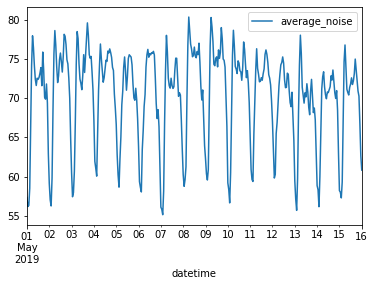

In [16]:
final_df_500['datetime'] = pd.to_datetime(final_df_500["measured_time"])
final_df_500 = final_df_500.resample(rule='1H', on='datetime').mean()
final_df_500.plot()

<AxesSubplot:xlabel='datetime'>

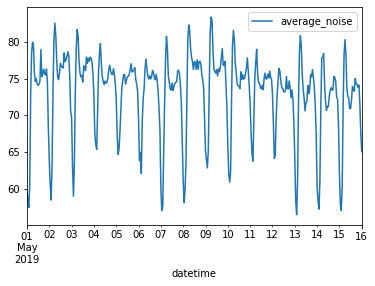

In [17]:
final_df_515['datetime'] = pd.to_datetime(final_df_515["measured_time"])
final_df_515 = final_df_515.resample(rule='1H', on='datetime').mean()
final_df_515.plot()

<AxesSubplot:xlabel='datetime'>

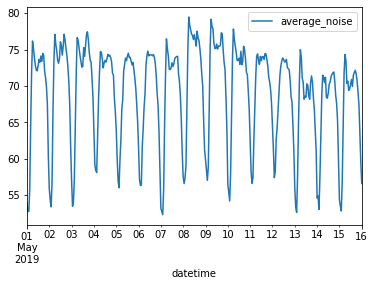

In [18]:
final_df_521['datetime'] = pd.to_datetime(final_df_521["measured_time"])
final_df_521 = final_df_521.resample(rule='1H', on='datetime').mean()
final_df_521.plot()

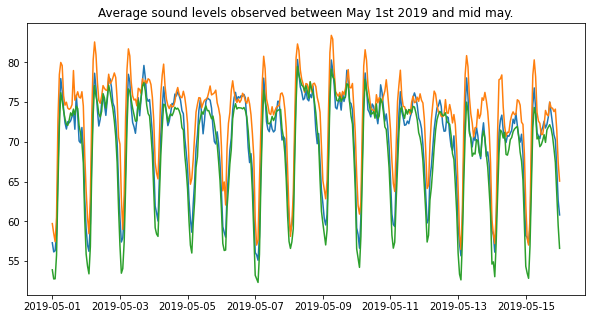

In [19]:
plt.figure(figsize=(10,5))
plt.title("Average sound levels observed between May 1st 2019 and mid may.")
plt.plot(final_df_500)
plt.plot(final_df_515)
plt.plot(final_df_521)


<b>Select Data for final Evaluation of optimized and without optimized.</b>

In [20]:
final_515_for_evaluation_n = final_515_for_evaluation[(final_515_for_evaluation['measured_time'] > '2019-05-01 00:00:00+00:00') & (final_515_for_evaluation['measured_time'] <= '2020-01-31 00:00:00+00:00')]
final_515_for_evaluation_n.head()

,average_noise,measured_time
15815,62.008919,2019-05-01 00:15:00+00:00
15816,57.312152,2019-05-01 00:30:00+00:00
15817,59.867483,2019-05-01 00:45:00+00:00
15818,60.245262,2019-05-01 01:00:00+00:00
15819,58.511136,2019-05-01 01:15:00+00:00


<b>Preprocessing Data</b>

In [21]:
import numpy as np

dataset = final_515_for_evaluation_n.average_noise.values
print(dataset.shape)
dataset = np.reshape(dataset, (-1,1))
print(dataset.shape)

(26281,)
(26281, 1)


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [23]:
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(train.shape)
print(test.shape)

(23652, 1)
(2629, 1)


<b> Generate Time Series </b>

In [24]:
from keras.preprocessing.sequence import TimeseriesGenerator

def GenerateTimeSeries(lookback,optimised):
    if optimised:
        train_data_gen = TimeseriesGenerator(train,train,length=lookback,shuffle=True,sampling_rate=1,stride=1,batch_size=10)
        test_data_gen = TimeseriesGenerator(test,test,length=lookback,shuffle=True,sampling_rate=1,stride=1,batch_size=1)
    else:
        train_data_gen = TimeseriesGenerator(train,train,length=lookback,sampling_rate=1,stride=1,batch_size=10)
        test_data_gen = TimeseriesGenerator(test,test,length=lookback,sampling_rate=1,stride=1,batch_size=1)
    return train_data_gen,test_data_gen


<b>Model Generation</b>

In [38]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM,Conv1D
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from IPython.display import Image

def CreateModel(epoch,lookback,network,optimizer,optimised):
    train_data_gen,test_data_gen = GenerateTimeSeries(lookback,optimised)
    #test_data_gen = TimeseriesGenerator(test,test,length=lookback,sampling_rate=1,stride=1,batch_size=1)
    if network == 'StackedCNN':
        model = Sequential()
        model.add(LSTM(150, input_shape=(lookback,1),return_sequences=True, activation='relu'))
        model.add(LSTM(100,activation='relu'))
        model.add(Dense(1,activation='linear'))
        model.summary()
        model.compile(loss='mean_squared_error', optimizer=optimizer)
        model.save('model/model_'+str(lookback)+'_'+str(epoch)+'.h5')
        plot_model(model, to_file='model/model_'+str(lookback)+'_'+str(epoch)+'.png', show_shapes=True)
        Image(filename='model/model_'+str(lookback)+'_'+str(epoch)+'.png')
        
        if optimised:
            history = model.fit(train_data_gen,epochs=epoch,validation_data=test_data_gen,callbacks=[EarlyStopping(monitor='val_loss',patience=5)], verbose=1,shuffle=True)
        else:
            history = model.fit(train_data_gen,epochs=epoch,validation_data=test_data_gen,callbacks=[EarlyStopping(monitor='val_loss',patience=10)],verbose=1,shuffle=True)

    if network == "CNNLSTM":
        model = Sequential()
        model.add(Conv1D(16, kernel_size=3, kernel_initializer='glorot_uniform',input_shape=(lookback,1),padding='same'))  
        model.add(Conv1D(16, kernel_size=3, kernel_initializer='glorot_uniform',padding='same'))
        model.add(Conv1D(16, kernel_size=3, kernel_initializer='glorot_uniform',padding='same'))
        model.add(LSTM(150,return_sequences=True))
        model.add(LSTM(100,activation='relu'))
        model.add(Dense(1,activation='linear'))
        model.compile(loss='mean_squared_error', optimizer=optimizer)
        model.summary()
        model.save('model/CNN-LSTM_model_'+str(lookback)+'_'+str(epoch)+'.h5')
        plot_model(model, to_file='model/CNN-LSTM_model_'+str(lookback)+'_'+str(epoch)+'.png', show_shapes=True)
        Image(filename='model/CNN-LSTM_model_'+str(lookback)+'_'+str(epoch)+'.png')
        if optimised:
            history = model.fit(train_data_gen,epochs=epoch,validation_data=test_data_gen,callbacks=[EarlyStopping(monitor='val_loss',patience=5)], verbose=1,shuffle=True)
        else:
            history = model.fit(train_data_gen,epochs=epoch,validation_data=test_data_gen,callbacks=[EarlyStopping(monitor='val_loss',patience=10)],verbose=1,shuffle=True)

    return model,history 

In [32]:
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    #print(y.shape)
    return y

In [33]:
def PredictedTrainTest(train_data_gen,test_data_gen,model,lookback):
    
    train_predict = model.predict(train_data_gen)
    test_predict = model.predict(test_data_gen)
    Y_train = get_y_from_generator(train_data_gen)
    Y_test = get_y_from_generator(test_data_gen)
    train_predict = scaler.inverse_transform(train_predict)
    Y_train = scaler.inverse_transform(Y_train)
    test_predict = scaler.inverse_transform(test_predict)
    Y_test = scaler.inverse_transform(Y_test)
    return Y_train, Y_test, train_predict, test_predict

<b>Evaluation Function for evaluate the model</b>

In [34]:
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def EvaluationRMSE(Y_train, Y_test, train_predict, test_predict):
    trainRMSE = np.sqrt(mean_squared_error(Y_train, train_predict))
    testRMSE = np.sqrt(mean_squared_error(Y_test, test_predict))
    return trainRMSE, testRMSE

In [35]:
def ModelWithEvaluation(epoch,lookback,network,optimizer,optimised):
    train_data_gen,test_data_gen = GenerateTimeSeries(lookback,optimised)
    model,history = CreateModel(epoch,lookback,network,optimizer,optimised)
    Y_train, Y_test, train_predict, test_predict = PredictedTrainTest(train_data_gen,test_data_gen,model,lookback)
    trainRMSE, testRMSE = EvaluationRMSE(Y_train, Y_test, train_predict, test_predict)
    return trainRMSE, testRMSE

<b>Final function to run the model and test the RMSE and execution time.</b>

In [36]:
import time
def finalResult(epoch,lookback,network,optimizer,optimised):
    start_time = time.time()
    trainRMSE, testRMSE = ModelWithEvaluation(epoch,lookback,network,optimizer,optimised)
    end_time = time.time()
    print("The result with epoch "+str(epoch)+" look_back "+str(lookback)+" algorithm "+network+" optimizer "+optimizer)
    print('Train Root Mean Squared Error:',trainRMSE)
    print('Test Root Mean Squared Error:',testRMSE)
    print('Total Execution Time:',str(end_time-start_time) +" seconds")
    print("\n")

<b>Run and check the Result one by one</b>

In [63]:
print("Evaluation of StackedCNN - Epoch and look_back")
finalResult(25,12,'StackedCNN','Nadam',False)

Evaluation of StackedCNN - Epoch and look_back
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 150)           91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
2364/2364 [==============================] - 30s 12ms/step - loss: 0.0158 - val_loss: 0.0016
Epoch 2/25
2364/2364 [==============================] - 29s 12ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 3/25
2364/2364 [==============================] - 27s 11ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 4/25
2364/2364 

In [64]:
finalResult(50,3,'StackedCNN','Nadam',False)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 3, 150)            91200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2365/2365 [==============================] - 14s 5ms/step - loss: 0.0176 - val_loss: 0.0020
Epoch 2/50
2365/2365 [==============================] - 11s 5ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 3/50
2365/2365 [==============================] - 11s 5ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 4/50
2365/2365 [==============================] - 11s 5ms/step 

In [65]:
finalResult(50,12,'StackedCNN','Nadam',False)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 12, 150)           91200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2364/2364 [==============================] - 28s 11ms/step - loss: 0.0136 - val_loss: 0.0015
Epoch 2/50
2364/2364 [==============================] - 26s 11ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/50
2364/2364 [==============================] - 26s 11ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
2364/2364 [==============================] - 26s 11ms/s

In [66]:
finalResult(50,24,'StackedCNN','Nadam',False)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 24, 150)           91200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2363/2363 [==============================] - 47s 19ms/step - loss: 0.0118 - val_loss: 0.0016
Epoch 2/50
2363/2363 [==============================] - 45s 19ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/50
2363/2363 [==============================] - 45s 19ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 4/50
2363/2363 [==============================] - 45s 19ms/s

In [67]:
finalResult(100,24,'StackedCNN','Nadam',False)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 24, 150)           91200     
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2363/2363 [==============================] - 51s 21ms/step - loss: 0.0121 - val_loss: 0.0023
Epoch 2/100
2363/2363 [==============================] - 48s 21ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 3/100
2363/2363 [==============================] - 49s 21ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 4/100
2363/2363 [==============================] - 49s 21

In [68]:
finalResult(100,36,'StackedCNN','Nadam',False)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 36, 150)           91200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2362/2362 [==============================] - 73s 30ms/step - loss: 0.0127 - val_loss: 0.0017
Epoch 2/100
2362/2362 [==============================] - 70s 30ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/100
2362/2362 [==============================] - 71s 30ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/100
2362/2362 [==============================] - 66s 28

In [69]:
print("Evaluation of CNNLSTM - Epoch and look_back")
finalResult(25,12,'CNNLSTM','Nadam',False)

Evaluation of CNNLSTM - Epoch and look_back
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 16)            64        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 16)            784       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 12, 16)            784       
_________________________________________________________________
lstm_12 (LSTM)               (None, 12, 150)           100200    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
____

In [70]:
finalResult(50,3,'CNNLSTM','Nadam',False)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 3, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 3, 16)             784       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 3, 16)             784       
_________________________________________________________________
lstm_14 (LSTM)               (None, 3, 150)            100200    
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
________________________________________________

In [71]:
finalResult(50,12,'CNNLSTM','Nadam',False)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 12, 16)            64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 12, 16)            784       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 12, 16)            784       
_________________________________________________________________
lstm_16 (LSTM)               (None, 12, 150)           100200    
_________________________________________________________________
lstm_17 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
________________________________________________

In [72]:
finalResult(50,24,'CNNLSTM','Nadam',False)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 24, 16)            64        
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 24, 16)            784       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 24, 16)            784       
_________________________________________________________________
lstm_18 (LSTM)               (None, 24, 150)           100200    
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
________________________________________________

In [73]:
finalResult(100,24,'CNNLSTM','Nadam',False)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 24, 16)            64        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 24, 16)            784       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 24, 16)            784       
_________________________________________________________________
lstm_20 (LSTM)               (None, 24, 150)           100200    
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
_______________________________________________

In [74]:
finalResult(100,36,'CNNLSTM','Nadam',False)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 36, 16)            64        
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 36, 16)            784       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 36, 16)            784       
_________________________________________________________________
lstm_22 (LSTM)               (None, 36, 150)           100200    
_________________________________________________________________
lstm_23 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
_______________________________________________

In [39]:
print("Evaluation of StackedCNN - Optimized")
finalResult(300,3,'StackedCNN','Nadam',True)

Evaluation of StackedCNN - Optimized
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 3, 150)            91200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
2365/2365 [==============================] - 15s 5ms/step - loss: 0.0154 - val_loss: 0.0022
Epoch 2/300
2365/2365 [==============================] - 12s 5ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3/300
2365/2365 [==============================] - 12s 5ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 4/300
2365/2365 [======

In [40]:
finalResult(300,3,'StackedCNN','adam',True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 150)            91200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
2365/2365 [==============================] - 13s 5ms/step - loss: 0.0164 - val_loss: 0.0018
Epoch 2/300
2365/2365 [==============================] - 10s 4ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/300
2365/2365 [==============================] - 10s 4ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 4/300
2365/2365 [==============================] - 10s 4ms/s

In [41]:
finalResult(300,3,'StackedCNN','rmsprop',True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 3, 150)            91200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
2365/2365 [==============================] - 13s 5ms/step - loss: 0.0117 - val_loss: 0.0023
Epoch 2/300
2365/2365 [==============================] - 11s 5ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 3/300
2365/2365 [==============================] - 11s 5ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 4/300
2365/2365 [==============================] - 11s 5ms/s

In [42]:
print("Evaluation of CNNLSTM - Optimized")
finalResult(300,3,'CNNLSTM','Nadam',True)

Evaluation of CNNLSTM - Optimized
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3, 16)             64        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 16)             784       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 16)             784       
_________________________________________________________________
lstm_8 (LSTM)                (None, 3, 150)            100200    
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
______________

In [43]:
finalResult(300,3,'CNNLSTM','adam',True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 3, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 3, 16)             784       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 3, 16)             784       
_________________________________________________________________
lstm_10 (LSTM)               (None, 3, 150)            100200    
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
________________________________________________

In [44]:
finalResult(300,3,'CNNLSTM','rmsprop',True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 3, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 3, 16)             784       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 3, 16)             784       
_________________________________________________________________
lstm_12 (LSTM)               (None, 3, 150)            100200    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
________________________________________________